# Time-series Forecasting

## 0. Wikipedia Traffic Dataset

https://www.kaggle.com/competitions/web-traffic-time-series-forecasting

In [1]:
import pandas as pd
import numpy as np

train = pd.read_pickle("train.pkl").asfreq('D')
test = pd.read_pickle("test.pkl").asfreq('D')

train

Page,!vote_en.wikipedia.org_all-access_all-agents,!vote_en.wikipedia.org_all-access_spider,!vote_en.wikipedia.org_desktop_all-agents,"""Awaken,_My_Love!""_en.wikipedia.org_all-access_all-agents","""Awaken,_My_Love!""_en.wikipedia.org_all-access_spider","""Awaken,_My_Love!""_en.wikipedia.org_desktop_all-agents","""European_Society_for_Clinical_Investigation""_en.wikipedia.org_all-access_all-agents","""European_Society_for_Clinical_Investigation""_en.wikipedia.org_all-access_spider","""European_Society_for_Clinical_Investigation""_en.wikipedia.org_desktop_all-agents","""Heroes""_(David_Bowie_album)_en.wikipedia.org_all-access_all-agents",...,龔嘉欣_zh.wikipedia.org_mobile-web_all-agents,龔照勝_zh.wikipedia.org_desktop_all-agents,龙生九子_zh.wikipedia.org_mobile-web_all-agents,대문_commons.wikimedia.org_all-access_all-agents,대문_commons.wikimedia.org_all-access_spider,대문_commons.wikimedia.org_desktop_all-agents,［Alexandros］_ja.wikipedia.org_all-access_all-agents,［Alexandros］_ja.wikipedia.org_all-access_spider,［Alexandros］_ja.wikipedia.org_desktop_all-agents,［Alexandros］_ja.wikipedia.org_mobile-web_all-agents
2015-07-01,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125.0,10.0,95.0,165.0,20.0,154.0,5438.0,4.0,1077.0,4345.0
2015-07-02,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,166.0,5.0,86.0,196.0,27.0,182.0,5966.0,4.0,1210.0,4737.0
2015-07-03,7.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,199.0,4.0,87.0,181.0,11.0,168.0,5727.0,3.0,1080.0,4633.0
2015-07-04,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,134.0,25.0,86.0,167.0,25.0,153.0,7036.0,6.0,1285.0,5737.0
2015-07-05,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,179.0,6.0,81.0,131.0,14.0,92.0,7078.0,9.0,1296.0,5765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-06,8.0,2.0,2.0,1144.0,14.0,684.0,0.0,0.0,0.0,624.0,...,144.0,92.0,230.0,1757.0,1558.0,1742.0,1148.0,98.0,337.0,807.0
2017-09-07,5.0,2.0,2.0,1092.0,18.0,649.0,0.0,0.0,0.0,706.0,...,129.0,62.0,218.0,5808.0,5644.0,5803.0,1166.0,86.0,323.0,839.0
2017-09-08,15.0,2.0,9.0,1065.0,30.0,640.0,2.0,1.0,2.0,632.0,...,120.0,54.0,203.0,198.0,18.0,197.0,1076.0,63.0,264.0,807.0
2017-09-09,6.0,2.0,3.0,978.0,20.0,498.0,1.0,1.0,1.0,601.0,...,134.0,9.0,212.0,147.0,10.0,136.0,1218.0,81.0,259.0,954.0


In [2]:
test

JustPage,!vote_en.wikipedia.org_all-access_all-agents,!vote_en.wikipedia.org_all-access_spider,!vote_en.wikipedia.org_desktop_all-agents,"""Awaken,_My_Love!""_en.wikipedia.org_all-access_all-agents","""Awaken,_My_Love!""_en.wikipedia.org_all-access_spider","""Awaken,_My_Love!""_en.wikipedia.org_desktop_all-agents","""European_Society_for_Clinical_Investigation""_en.wikipedia.org_all-access_all-agents","""European_Society_for_Clinical_Investigation""_en.wikipedia.org_all-access_spider","""European_Society_for_Clinical_Investigation""_en.wikipedia.org_desktop_all-agents","""Heroes""_(David_Bowie_album)_en.wikipedia.org_all-access_all-agents",...,龔嘉欣_zh.wikipedia.org_mobile-web_all-agents,龔照勝_zh.wikipedia.org_desktop_all-agents,龙生九子_zh.wikipedia.org_mobile-web_all-agents,대문_commons.wikimedia.org_all-access_all-agents,대문_commons.wikimedia.org_all-access_spider,대문_commons.wikimedia.org_desktop_all-agents,［Alexandros］_ja.wikipedia.org_all-access_all-agents,［Alexandros］_ja.wikipedia.org_all-access_spider,［Alexandros］_ja.wikipedia.org_desktop_all-agents,［Alexandros］_ja.wikipedia.org_mobile-web_all-agents
JustDate,,,,,,,,,,,,,,,,,,,,,
2017-09-13,9.0,3.0,7.0,1010.0,21.0,582.0,2.0,2.0,0.0,602.0,...,128.0,181.0,168.0,169.0,12.0,164.0,1225.0,126.0,266.0,956.0
2017-09-14,9.0,1.0,4.0,997.0,26.0,569.0,-1.0,-1.0,0.0,597.0,...,108.0,349.0,202.0,146.0,14.0,141.0,1271.0,102.0,306.0,964.0
2017-09-15,6.0,0.0,3.0,976.0,27.0,566.0,-1.0,-1.0,0.0,666.0,...,94.0,29.0,220.0,192.0,20.0,184.0,1096.0,66.0,269.0,824.0
2017-09-16,13.0,2.0,5.0,1019.0,17.0,533.0,2.0,1.0,0.0,596.0,...,108.0,22.0,228.0,142.0,17.0,137.0,1127.0,67.0,267.0,852.0
2017-09-17,11.0,0.0,5.0,1062.0,32.0,520.0,-1.0,-1.0,0.0,701.0,...,144.0,31.0,292.0,161.0,23.0,150.0,1359.0,109.0,297.0,1055.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-09,4.0,1.0,2.0,915.0,17.0,534.0,1.0,1.0,0.0,711.0,...,241.0,6.0,152.0,191.0,14.0,180.0,1057.0,67.0,302.0,751.0
2017-11-10,4.0,0.0,2.0,882.0,11.0,501.0,-1.0,-1.0,0.0,697.0,...,185.0,3.0,166.0,230.0,21.0,215.0,1099.0,97.0,290.0,803.0
2017-11-11,4.0,1.0,2.0,832.0,8.0,423.0,-1.0,-1.0,0.0,727.0,...,174.0,13.0,212.0,232.0,34.0,213.0,1287.0,82.0,322.0,961.0


For simplicity reasons, let us just consider pages having at least 20 000 visits per days.

In [3]:
median_visits = train.median(axis = 0)
over20000 = median_visits >= 20_000
sum(over20000)

147

In [4]:
train_filtered = train.loc[:, over20000].apply(np.log1p).copy()
test_filtered = test.loc[:, over20000].apply(np.log1p).copy()

In [5]:
train_filtered.shape, test_filtered.shape   

((803, 147), (62, 147))

In [6]:
train_filtered.columns

Index(['Adolf_Hitler_en.wikipedia.org_all-access_all-agents',
       'Barack_Obama_en.wikipedia.org_all-access_all-agents',
       'Canada_en.wikipedia.org_all-access_all-agents',
       'China_en.wikipedia.org_all-access_all-agents',
       'Cristiano_Ronaldo_en.wikipedia.org_all-access_all-agents',
       'Donald_Trump_en.wikipedia.org_all-access_all-agents',
       'Donald_Trump_en.wikipedia.org_desktop_all-agents',
       'Donald_Trump_en.wikipedia.org_mobile-web_all-agents',
       'Dwayne_Johnson_en.wikipedia.org_all-access_all-agents',
       'Dwayne_Johnson_en.wikipedia.org_mobile-web_all-agents',
       ...
       'Заглавная_страница_ru.wikipedia.org_mobile-web_all-agents',
       'Служебная:Поиск_ru.wikipedia.org_all-access_all-agents',
       'Служебная:Поиск_ru.wikipedia.org_desktop_all-agents',
       'Служебная:Ссылки_сюда_ru.wikipedia.org_all-access_all-agents',
       'Служебная:Ссылки_сюда_ru.wikipedia.org_desktop_all-agents',
       'メインページ_ja.wikipedia.org_all-access

## 1. Plotting

Either select or pick randomly one column - try to plot the time series (training part). You can use `plot_series` from `sktime` package.

In [7]:
import random

selected_column = random.choice(train_filtered.columns)

selected_column

'Special:Search_es.wikipedia.org_all-access_all-agents'

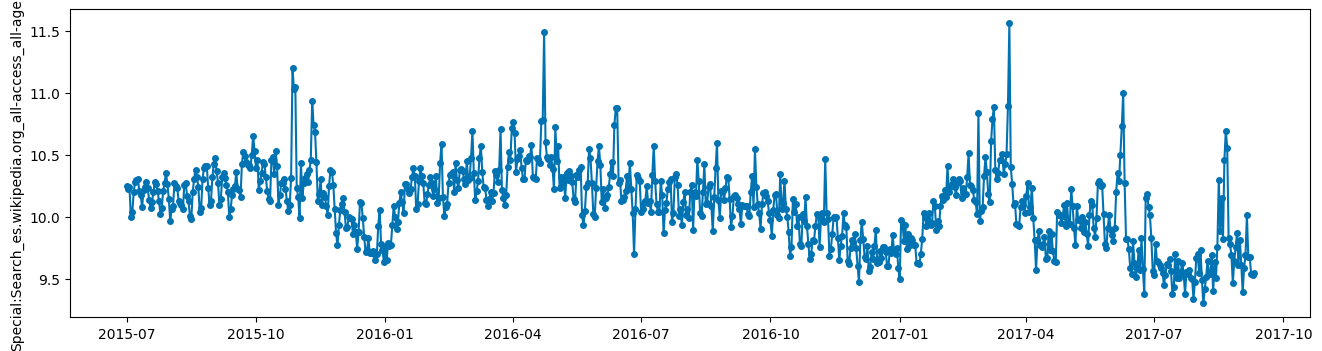

In [8]:
from sktime.utils.plotting import plot_series

# YOUR CODE HERE
plot_series(train_filtered[selected_column]);

Now try to plot both time series and the target (testing part)

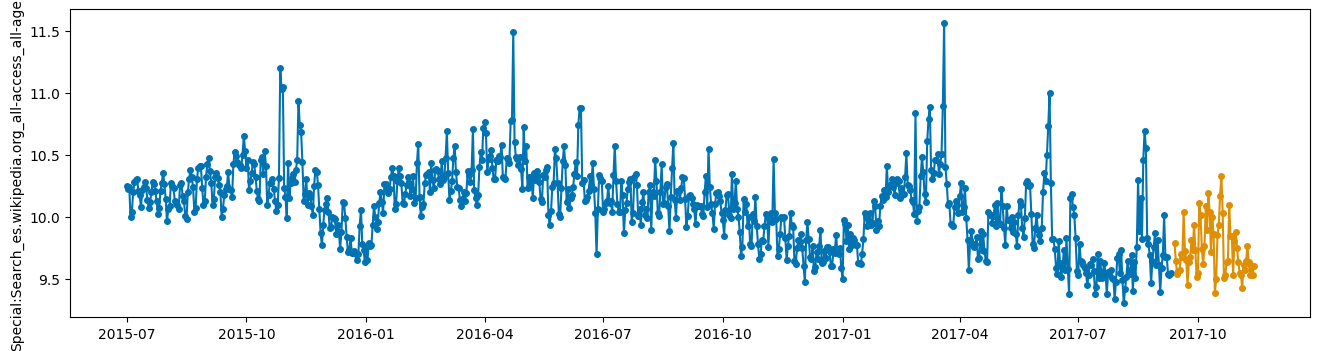

In [9]:
# YOUR CODE HERE
plot_series(train_filtered[selected_column], test_filtered[selected_column]);

## 2. Naive Forecasting

Let us start with a naive forecaster. 

In [10]:
from sktime.forecasting.naive import NaiveForecaster

fh = np.arange(3, 65)  # forecasting horizon, day 3 - day 65 after training

forecaster = NaiveForecaster(strategy="mean")

In [11]:
forecaster.fit(train_filtered[selected_column])

NaiveForecaster(strategy='mean')

In [12]:
prediction = forecaster.predict(fh)

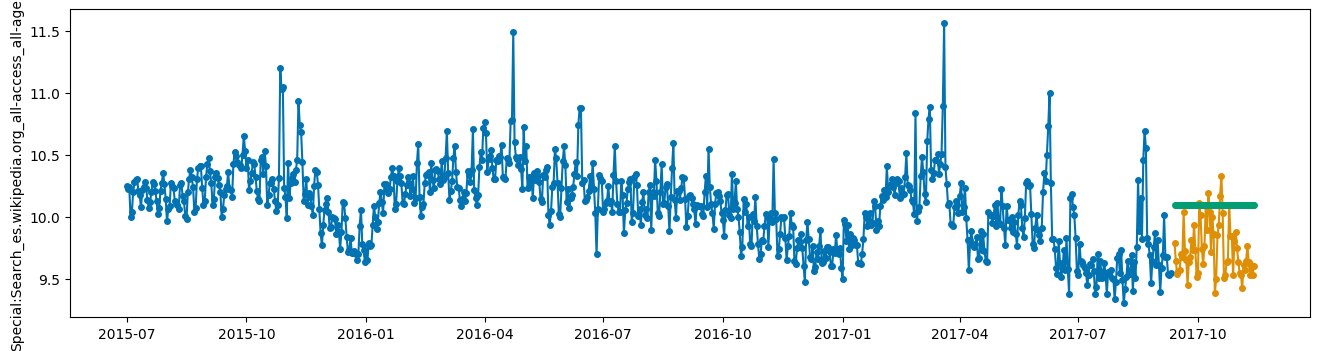

In [13]:
plot_series(train_filtered[selected_column], test_filtered[selected_column], prediction);

Now instead of average, try to repeat last week forever to the future (set `strategy` to `last` and period length `sp` to 7)

In [14]:
# YOUR CODE HERE
forecaster = NaiveForecaster(strategy="last", sp=7)

## 3. SMAPE

Kaggle competition used [symmetric mean absolute percentage error](https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error) (SMAPE) for evaluation. Calculate smape between your forecast and actual values.

In [15]:
def smape(y_true, y_pred):
    ## YOUR CODE HERE
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    smape_value = np.mean(np.abs(y_true - y_pred) / denominator) * 100
    return smape_value

In [16]:
smape(test_filtered[selected_column], prediction)

3.7178812906260377

## 4. Forecasing Methods

Look through `sktime` [list of forecasting methods](https://www.sktime.net/en/stable/examples/01_forecasting.html#2.-Forecasters-in-sktime---lookup,-properties,-main-families).

Try a few of them (docs contain examples how to use them, e.g. see [TBATS](https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.forecasting.tbats.TBATS.html) code below). Which prediction is the best (minimize SMAPE metric)

In [17]:
from sktime.forecasting.tbats import TBATS

forecaster = TBATS(  
    use_box_cox=False,
    use_trend=False,
    use_damped_trend=False,
    sp=7,
    use_arma_errors=False,
    n_jobs=1)

In [18]:
## YOUR CODE HERE

In [19]:
forecaster.fit(train_filtered[selected_column])
prediction = forecaster.predict(fh)

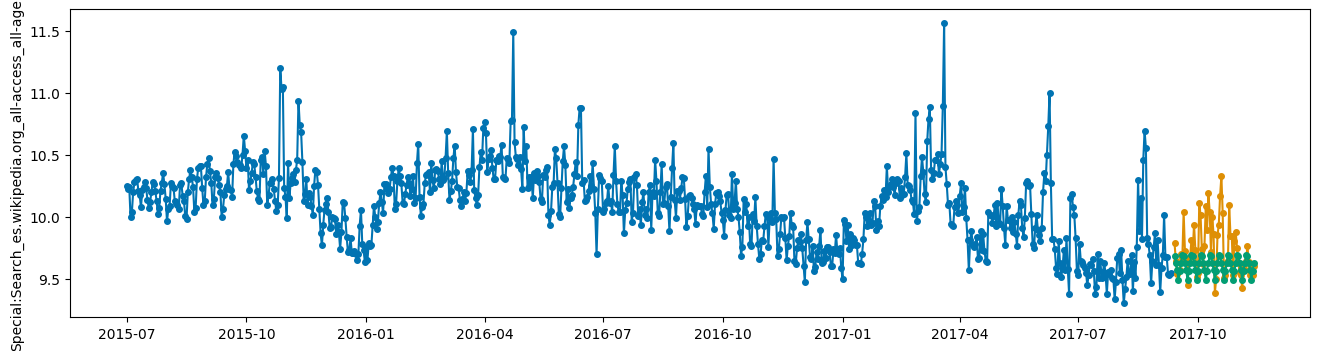

In [20]:
plot_series(train_filtered[selected_column], test_filtered[selected_column], prediction);

In [21]:
smape(test_filtered[selected_column], prediction)

1.6208181532699946

## 5. Prophet

[Prophet](https://facebook.github.io/prophet/) is (was?) Meta's tool for time series forecasting (easy handling of anomalies, common seasonalities and holidays).

In [22]:
from sktime.forecasting.fbprophet import Prophet

## YOUR CODE HERE
forecaster = Prophet(  
    seasonality_mode='additive',
    n_changepoints=int(10),
    add_country_holidays={'country_name': 'USA'},
    yearly_seasonality=True)

In [23]:
forecaster.fit(train_filtered[selected_column])
prediction = forecaster.predict(fh)

14:54:30 - cmdstanpy - INFO - Chain [1] start processing
14:54:30 - cmdstanpy - INFO - Chain [1] done processing


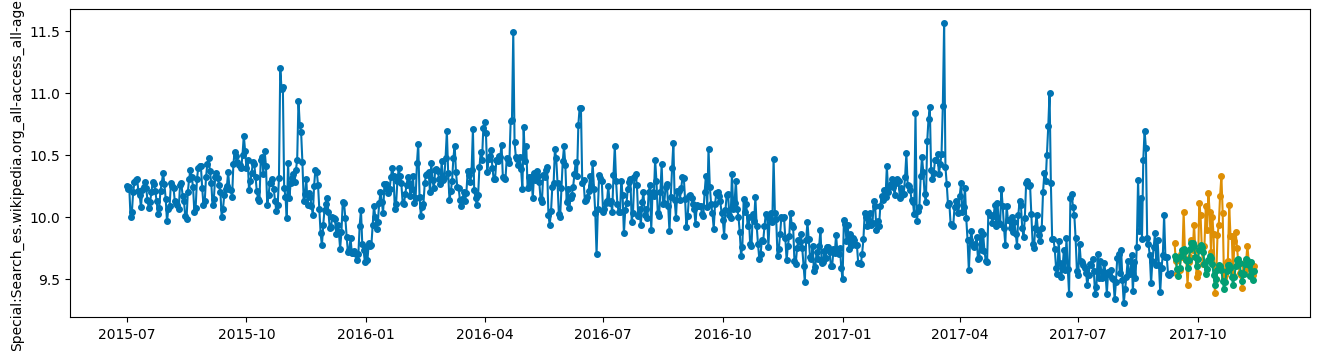

In [24]:
plot_series(train_filtered[selected_column], test_filtered[selected_column], prediction);

In [25]:
smape(test_filtered[selected_column], prediction)

1.6326451307015457

## 6. Time Series Foundation Models

In [26]:
from sktime.forecasting.moirai_forecaster import MOIRAIForecaster

## YOUR CODE HERE
forecaster = MOIRAIForecaster(
    checkpoint_path=f"sktime/moirai-1.0-R-small"
)

In [27]:
forecaster.fit(train_filtered[selected_column])
prediction = forecaster.predict(fh)

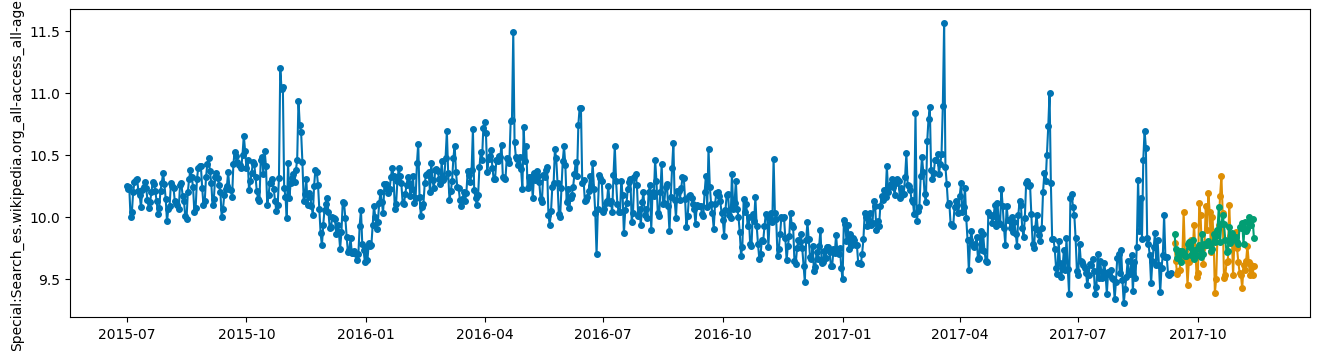

In [28]:
plot_series(train_filtered[selected_column], test_filtered[selected_column], prediction);

In [29]:
smape(test_filtered[selected_column], prediction)

2.0098319084464555